In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model
import streamlit as st

In [8]:
start = '2010-01-01'
end = '2019-12-31'

st.title('Stock Trend Prediction')

user_input =st.text_input('Enter Stock Ticker', 'AAPL')
df = data.DataReader(user_input, 'yahoo', start, end)

#Describing data
st.subheader('Data from 2010 - 2019')
st.write(df.describe())

In [3]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [4]:
start = '2010-01-01'
end = '2019-12-31'

st.title('Stock Trend Prediction')

user_input =st.text_input('Enter Stock Ticker', 'AAPL')
df = data.DataReader(user_input, 'yahoo', start, end)

#Describing data
st.subheader('Data from 2010 - 2019')
st.write(df.describe())

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

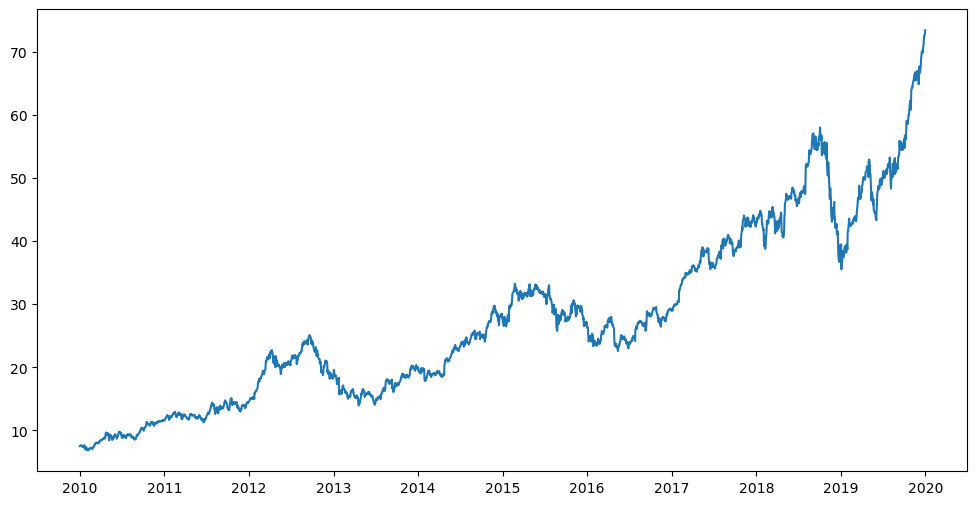

In [5]:
#visualizations
st.subheader('Closing Price vs Time Chart')
fig = plt.figure(figsize = (12,6))
plt.plot(df.Close)
st.pyplot(fig)

In [7]:

st.subheader('Closing Price vs Time Chart with 100MA')
ma100 = df.Close.rolling(100).mean()
fig = plt.figure(figsize = (12,6))
plt.plot(ma100)
plt.plot(df.Close)
st.pyplot(fig)

st.subheader('Closing Price vs Time Chart with 100MA & 200MA')
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
fig = plt.figure(figsize = (12,6))
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.plot(df.Close,'b')
st.pyplot(fig)




DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [9]:
#Spillting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)


x_train, y_train = np.array(x_train), np.array(y_train)

#Load my Model
model = load_model('keras_model.h5')


#Testing Part
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index = True)
input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
    

x_test, y_test = np.array(x_test), np.array(y_test)


y_predicted = model.predict(x_test)
scaler = scaler.scale_

scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


#Final Graph
st.subheader('Predictions vs Orginial')
fig2 = plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
st.pyplot(fig2)

(1761, 1)
(756, 1)


NameError: name 'x_train' is not defined